In [1]:
import math
import random
import matplotlib.pyplot as plt
from value import Value

def f(x):
    return 2.5 * x - 1.9

In [2]:
class RegressionModel:
    def __init__(self):
        self.w = Value(random.random() * 10)
        self.b = Value(random.random() * 10)
    
    def __call__(self, x):
        return self.w * x + self.b
    
    def zero_grad(self):
        self.w.zero_grad()
        self.b.zero_grad()

model = RegressionModel()

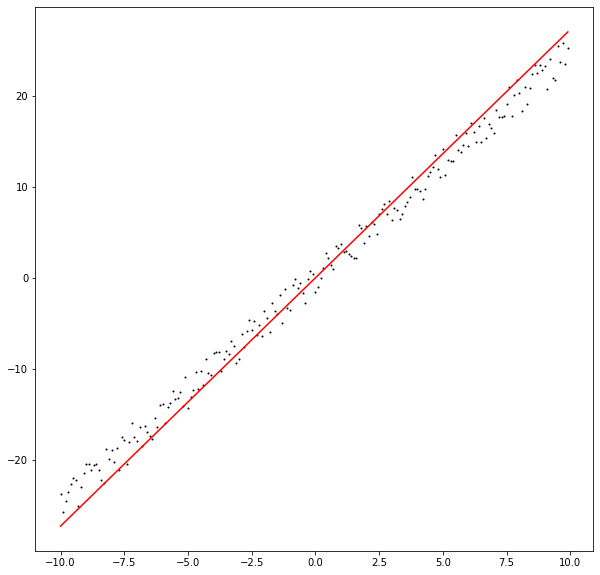

In [126]:
Xs = [x / 10 for x in range(-100, 100)]
Ys = [f(x) + random.random() * 4 for x in Xs]
y_preds = [model(x).data for x in Xs]

plt.scatter(Xs, Ys, s=1, c="black", figure=plt.figure(figsize=(10, 10)))
plt.plot(Xs, y_preds, c="red")

In [125]:
from loss import L2Loss

loss_fn = L2Loss()
loss = Value(0.0)

model.zero_grad()
loss.zero_grad()

train_dataset = list(zip(Xs, Ys))
random.shuffle(train_dataset)

total_loss = 0.0

for x, y in train_dataset:
    # print(loss.data,  x)
    y_pred = model(x)
    # print(y_pred.data)

    loss = loss_fn(y_pred, y)
    total_loss += loss.data

    loss.backward()
    # print(loss.data)
    loss.step(lr=1e-8)

print("total_loss: ", total_loss)

total_loss:  640.0612155476764
